(Click on the below links to navigate to different sections of the notebook)
# **Overview**  
- <a href="#1"> 1. Importing Data</a>
- <a href="#2"> 2. Preprocessing the Dataset</a>
  -  <a href="#2-1" > 2.1 Check for NULLS (missing data)</a>
  -  <a href="#2-2" > 2.2 Filling the missing data</a>
  -  <a href="#2-3" > 2.3 Check the datatype of columns</a>
  -  <a href="#2-4" > 2.4 Remove Outliers</a>
  -  <a href="#2-5" > 2.5 Feature Engineering</a>
- <a href="#3"> 3. Explanatory Data Analysis </a>
  -  <a href="#3-1" > 3.1 Distribution of "KMs Driven", "Price", "Year" <a>
  -  <a href="#3-2" > 3.2 Pairplot of different features with "Price"</a>
  -  <a href="#3-3" > 3.3 Percentage of each "fuel" types for "Used" condition</a>
  -  <a href="#3-4" > 3.4 Percentage of each "fuel" types for "New" condition</a>
  -  <a href="#3-5" > 3.5 Count plot of "Used" and "New" having Transaction Type "Cash" for Fuel features</a>
  -  <a href="#3-6" > 3.6 Variation of Price with Year</a>
  -  <a href="#3-7" > 3.7 Encoding the categorical data (one hot Encoding)</a>
- <a href="#4"> 4. Divide the data into training and testing data </a>
- <a href="#5"> 5. Model</a>
  -  <a href="#5-1" > A. Random forest Regressor</a>
     -  <a href="#5-1-1" > Grid searching of hyperparameters</a>
     -  <a href="#5-1-2" > K-Fold cross validation</a>
     -  <a href="#5-1-3" > Correlation Matrix</a>
     -  <a href="#5-1-4" > A. Random forest Regressor</a>
  -  <a href="#5-2" > B. Linear Regression</a>
     -  <a href="#5-2-1" > Train R squared score</a>
     -  <a href="#5-2-2" > Root mean squared error</a>
     -  <a href="#5-2-3" > K-Fold Cross Validation</a>
     -  <a href="#5-2-4" > Scatter Plot of Predicted Price Vs Actual Price</a>  
     -  <a href="#5-2-5" > Residual Plot</a> 
- <a href="#6"> 6. Final prediction and Conclusion</a>



In [228]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 

import seaborn as sns

import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## <a id="1"> 1. Importing Data </a>

In [229]:
df2 = pd.read_csv('OLX_Car_Data_CSV.csv',encoding= 'latin1')
df2 = df2.sample(frac=1).reset_index(drop=True)# shuffle
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 24973 rows and 9 columns


In [230]:
display(df2.head(5))
df2.columns

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Honda,New,Petrol,30000.0,City Aspire,2035000,Islamabad,Cash,2017.0
1,Suzuki,Used,CNG,26000.0,Margalla,485000,Karachi,Cash,1996.0
2,Toyota,Used,Petrol,11000.0,Passo,1700000,Karachi,Cash,2016.0
3,Suzuki,Used,CNG,89000.0,Cultus VXR,715000,Karachi,Cash,2011.0
4,Daihatsu,Used,CNG,12345.0,Charade,70000,Karachi,Cash,1982.0


Index(['Brand', 'Condition', 'Fuel', 'KMs Driven', 'Model', 'Price',
       'Registered City', 'Transaction Type', 'Year'],
      dtype='object')

## <a id="2" > 2. Preprocessing the Dataset</a>

#### Checking values of categorical attributes

In [231]:
cat_val = ['Brand', 'Condition', 'Fuel', 'Model',
       'Registered City', 'Transaction Type']

for col in cat_val:
    print ([col]," : ",df2[col].unique())

['Brand']  :  ['Honda' 'Suzuki' 'Toyota' 'Daihatsu' 'Nissan' nan 'Other Brands'
 'Hyundai' 'Mazda' 'Mitsubishi' 'Daewoo' 'FAW' 'BMW' 'Mercedes'
 'Chevrolet' 'Audi' 'KIA' 'Classic & Antiques' 'Range Rover' 'Changan'
 'Subaru' 'Land Rover' 'Lexus' 'Porsche']
['Condition']  :  ['New' 'Used' nan]
['Fuel']  :  ['Petrol' 'CNG' nan 'Hybrid' 'Diesel' 'LPG']
['Model']  :  ['City Aspire' 'Margalla' 'Passo' 'Cultus VXR' 'Charade' 'Alto' 'Potohar'
 'Mehran VXR' 'Civic VTi Oriel Prosmatec' 'Bolan' 'Sunny' 'Liana'
 'Mehran VX' nan 'Corolla XE' 'Wagon R' 'Corolla GLI' 'Vezel' '86' 'N Wgn'
 'Other' 'Corona' 'Vitz' 'Corolla Axio' 'Hijet' 'Khyber' 'Civic Prosmetic'
 'Santro' 'Corolla Fielder' 'Every' 'Prado' 'FX' 'Move' 'Cultus VX' '323'
 'Cultus VXL' 'Corolla XLI' 'Aqua' 'Civic VTi' 'Crown' 'Bluebird Sylphy'
 'BR-V' 'City IVTEC' 'City IDSI' 'Duet' 'Pajero Mini' 'Civic EXi' 'Accord'
 'Premio' 'Corolla 2.0 D' 'Mira' 'Racer' 'Cuore' 'Cervo' 'Clipper'
 'Corrolla Altis' 'V2' 'Every Wagon' 'Pixis Epoch' 'Civ

### <a id="2-1" > 2.1 Check for NULLS (missing data)</a>

Visual display of null values in each columns for quick overview

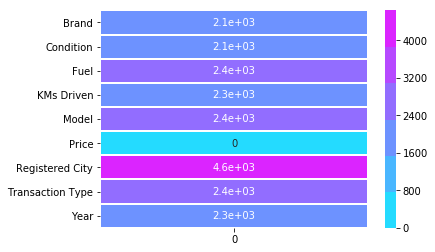

In [232]:
sns.heatmap(pd.DataFrame(df2.isnull().sum()),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")


In [233]:
print("Number of Null values in train dataset\n")
print(df2.isnull().sum(axis = 0))

Number of Null values in train dataset

Brand               2137
Condition           2136
Fuel                2445
KMs Driven          2286
Model               2448
Price                  0
Registered City     4636
Transaction Type    2445
Year                2284
dtype: int64


There are too many missing values in the dataset. So instead of removing them <br>we will fill it median, average or most frequent
data.<br>
We will consider "NaN" as some data point. So let's replace it with word "unknown" <br>to treat it as a categorical 
value in its respective columns.

**Replace the NaN-Values with dummies <br>Replacing "NaN" with "unknown" to treat it as a categorical values in their respective columns**

In [234]:
#Train dataset
df2['Brand'].fillna(value='unknown', inplace=True)
df2['Condition'].fillna(value='unknown', inplace=True)
df2['Fuel'].fillna(value='unknown', inplace=True)
df2['Model'].fillna(value='unknown', inplace=True)
df2['Registered City'].fillna(value='unknown', inplace=True)
df2['Transaction Type'].fillna(value='unknown', inplace=True)

In [235]:
print("Number of Null values in train dataset\n")
print(df2.isnull().sum(axis = 0))

Number of Null values in train dataset

Brand                  0
Condition              0
Fuel                   0
KMs Driven          2286
Model                  0
Price                  0
Registered City        0
Transaction Type       0
Year                2284
dtype: int64


Let's now fill the missing values in the column "KMs Driven" with average values.

### <a id="2-2" > 2.2 Filling the missing data</a>

In [236]:
#Train dataset
df2['KMs Driven'].fillna((df2['KMs Driven'].mean()),inplace = True) #average data 
# df2['Year'].fillna(df2['Year'].value_counts().index[0],inplace = True) #most frequent data

In [237]:
print("Number of Null values in train dataset\n")
print(df2.isnull().sum(axis = 0))

Number of Null values in train dataset

Brand                  0
Condition              0
Fuel                   0
KMs Driven             0
Model                  0
Price                  0
Registered City        0
Transaction Type       0
Year                2284
dtype: int64


In [238]:
df2=df2.dropna() #drop rows with atleast a column with missing values


In [239]:
print("Train : ", df2.shape)

Train :  (22689, 9)


### <a id="2-3" > 2.3 Check the datatype of columns</a>

In [240]:
df2.dtypes

Brand                object
Condition            object
Fuel                 object
KMs Driven          float64
Model                object
Price                 int64
Registered City      object
Transaction Type     object
Year                float64
dtype: object

In [241]:
#Train dataset
df2.describe()

,KMs Driven,Price,Year
count,2.268900e+04,2.268900e+04,22689.000000
mean,1.278112e+05,9.212113e+05,2005.901626
std,5.996462e+05,1.593948e+06,9.563804
min,1.000000e+00,5.000000e+04,1915.000000
25%,1.600000e+04,3.800000e+05,2002.000000
50%,6.659200e+04,6.550000e+05,2008.000000
75%,1.000000e+05,1.150000e+06,2013.000000
max,1.000000e+07,8.765432e+07,2020.000000


### <a id="2-4" > 2.4 Remove Outliers</a>

#### Distribution of "Price" in train dataset

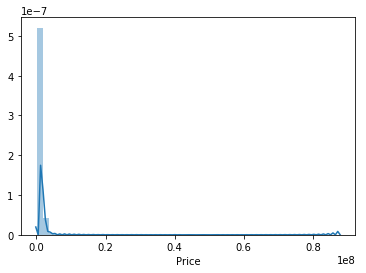

In [242]:
sns.distplot(df2["Price"])

#### Distribution of "KMs Driven" in train dataset

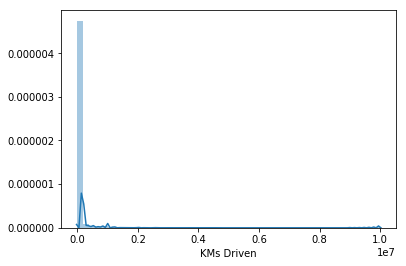

In [243]:
sns.distplot(df2["KMs Driven"])

#### Distribution of "Year" in train dataset

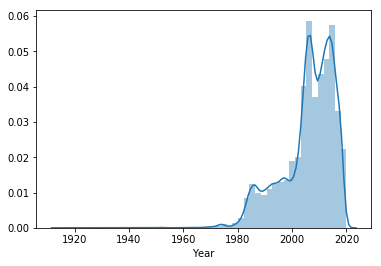

In [244]:
sns.distplot(df2["Year"])

Determine outliers in dataset

In [245]:
cols=['Price']


for i in cols:
    quartile_1,quartile_3 = np.percentile(df2[i],[25,75])
    quartile_f,quartile_l = np.percentile(df2[i],[1,99])
    IQR = quartile_3-quartile_1
    lower_bound = quartile_1 - (1.5*IQR)
    upper_bound = quartile_3 + (1.5*IQR)
    print(i,lower_bound,upper_bound,quartile_f,quartile_l)

    df2[i].loc[df2[i] < lower_bound] = quartile_f
    df2[i].loc[df2[i] > upper_bound] = quartile_l


Price -775000.0 2305000.0 95000.0 4536799.999999985


In [246]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

df2=remove_outlier(df2, 'Price')
# df2=remove_outlier(df2, 'KMs Driven')
# df2=remove_outlier(df2, 'Year')

#### After removing outlier in 'Price'

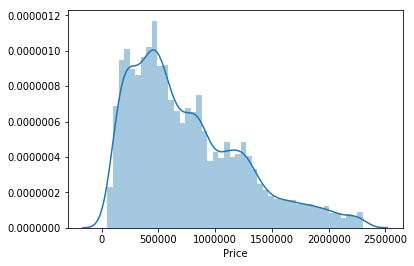

In [247]:
sns.distplot(df2["Price"])

### <a id="2-5" > 2.5 Feature Engineering</a>

In [248]:
df2['Damaged'] = np.where(df2['KMs Driven']> 2000000, 'too_old', 'old')

In [249]:
df2.head()

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year,Damaged
0,Honda,New,Petrol,30000.0,City Aspire,2035000.0,Islamabad,Cash,2017.0,old
1,Suzuki,Used,CNG,26000.0,Margalla,485000.0,Karachi,Cash,1996.0,old
2,Toyota,Used,Petrol,11000.0,Passo,1700000.0,Karachi,Cash,2016.0,old
3,Suzuki,Used,CNG,89000.0,Cultus VXR,715000.0,Karachi,Cash,2011.0,old
4,Daihatsu,Used,CNG,12345.0,Charade,70000.0,Karachi,Cash,1982.0,old


Price of cars whose price is more than 1500000 it considered as expensive.

## <a id="3">3. Explanatory Data Analysis </a>

### <a id="3-1" > 3.1 Distribution of "KMs Driven", "Price", "Year" in train dataset<a>

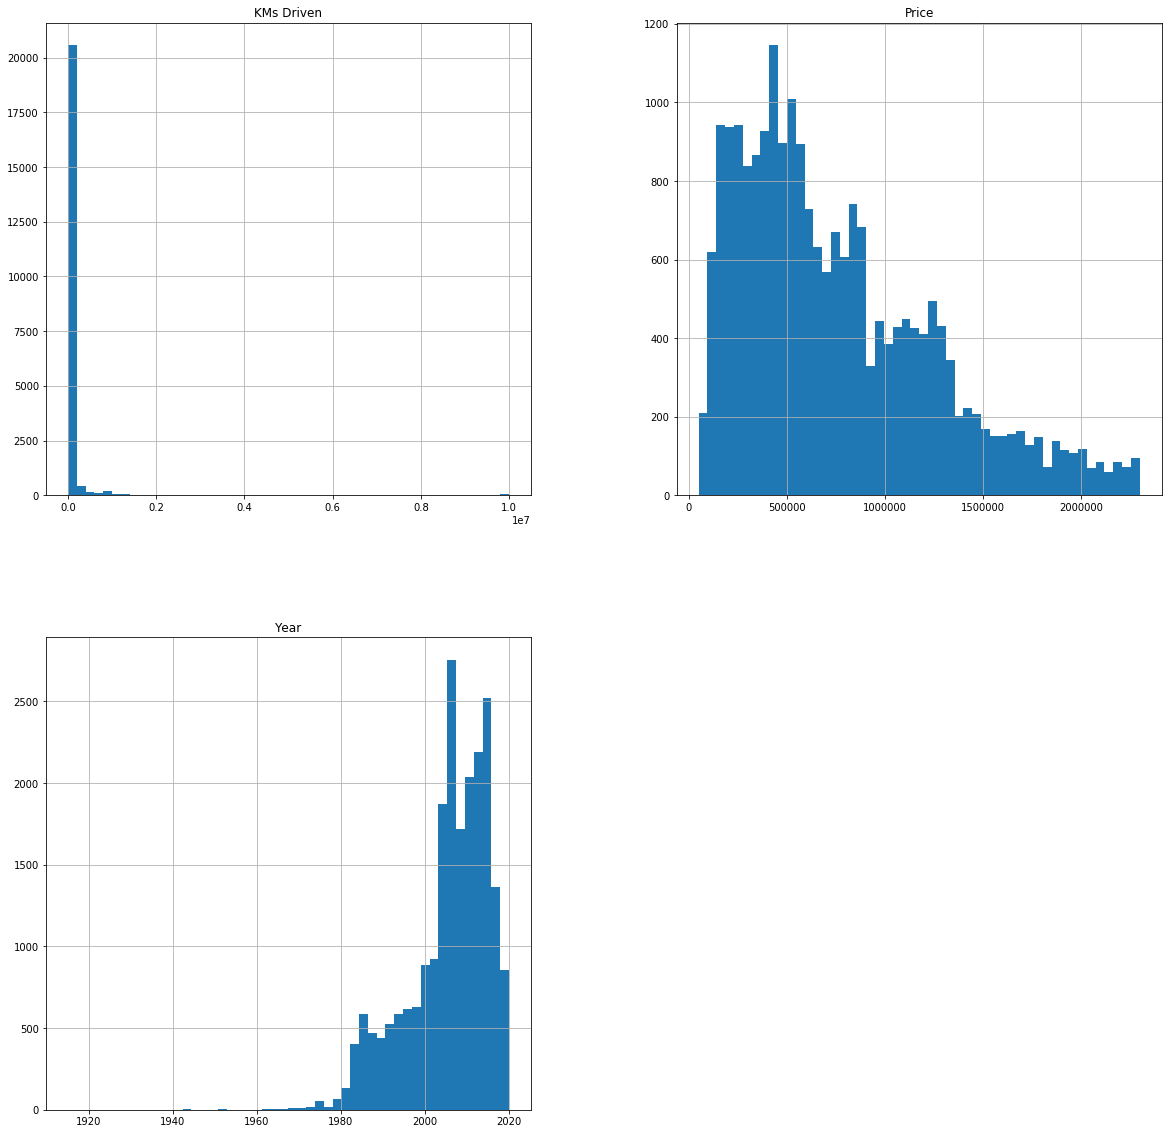

In [250]:
#Train Dataset
df2.hist(bins = 50 , figsize = (20,20))
plt.show()

### <a id="3-2" > 3.2 Pairplot of different features with "Price"</a>

Pairplot to visualize the realtionship between the target and independent features

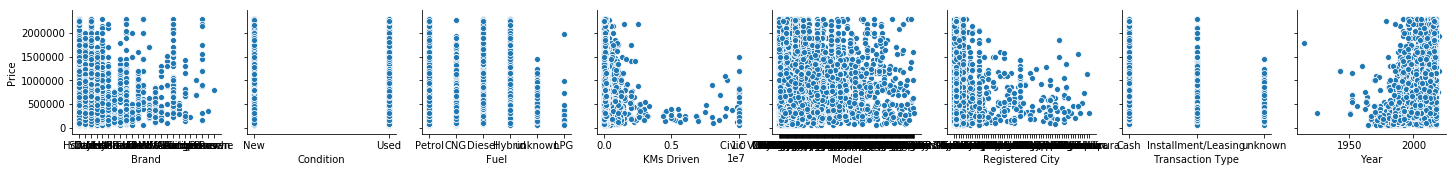

In [251]:

sns.pairplot(df2, x_vars=['Brand', 'Condition', 'Fuel', 'KMs Driven', 'Model',
       'Registered City', 'Transaction Type', 'Year'], y_vars=["Price"],aspect=1);


It can be observed that there is some linear relationship (rougly) between dependent variable "Price"
and independent variables "Brand", "KMs Driven", "Registered City" and "Year" .

So let's draw these plots separately for clear view.

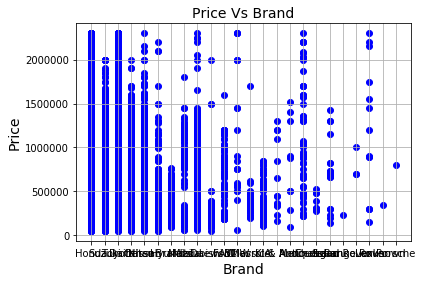

In [252]:
plt.scatter(df2['Brand'], df2['Price'], color='blue')
plt.title('Price Vs Brand', fontsize=14)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

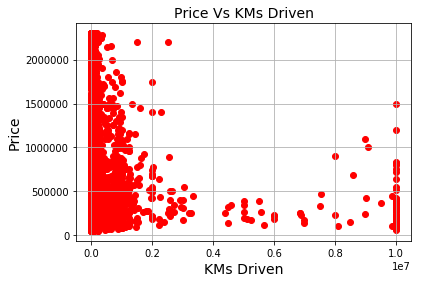

In [253]:
plt.scatter(df2['KMs Driven'], df2['Price'], color='red')
plt.title('Price Vs KMs Driven', fontsize=14)
plt.xlabel('KMs Driven', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

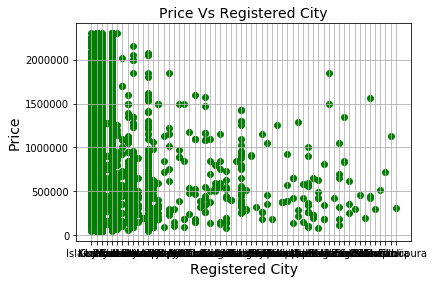

In [254]:
plt.scatter(df2['Registered City'], df2['Price'], color='green')
plt.title('Price Vs Registered City', fontsize=14)
plt.xlabel('Registered City', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

### <a id="3-3" > 3.3 Percentage of each "fuel" types for "Used" condition</a>

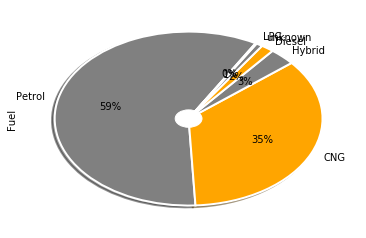

In [255]:
df2[df2["Condition"] == "Used"]["Fuel"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["grey","orange"],startangle = 60,                                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.1,color="white")
plt.gca().add_artist(circ) 


### <a id="3-4" > 3.4 Percentage of each "fuel" types for "New" condition</a>

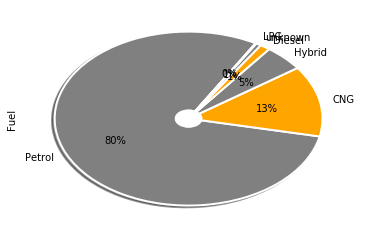

In [256]:
df2[df2["Condition"] == "New"]["Fuel"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["grey","orange"],startangle = 60,                                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.1,color="white")
plt.gca().add_artist(circ) 


We can observe that new car uses CNG less than old car.

### <a id="3-5" > 3.5 Count plot of "Used" and "New" having Transaction Type "Cash" for Fuel features</a>

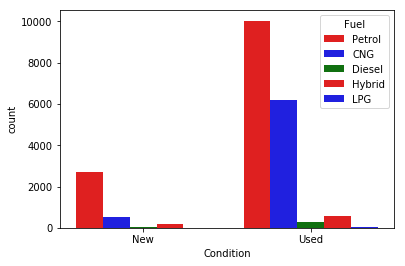

In [257]:
ax = sns.countplot("Condition",hue="Fuel",data=df2[df2["Transaction Type"] == "Cash"],palette=["r","b","g"])
ax.set_facecolor("white")

### <a id="3-6" > 3.6 Variation of Price with Year</a>

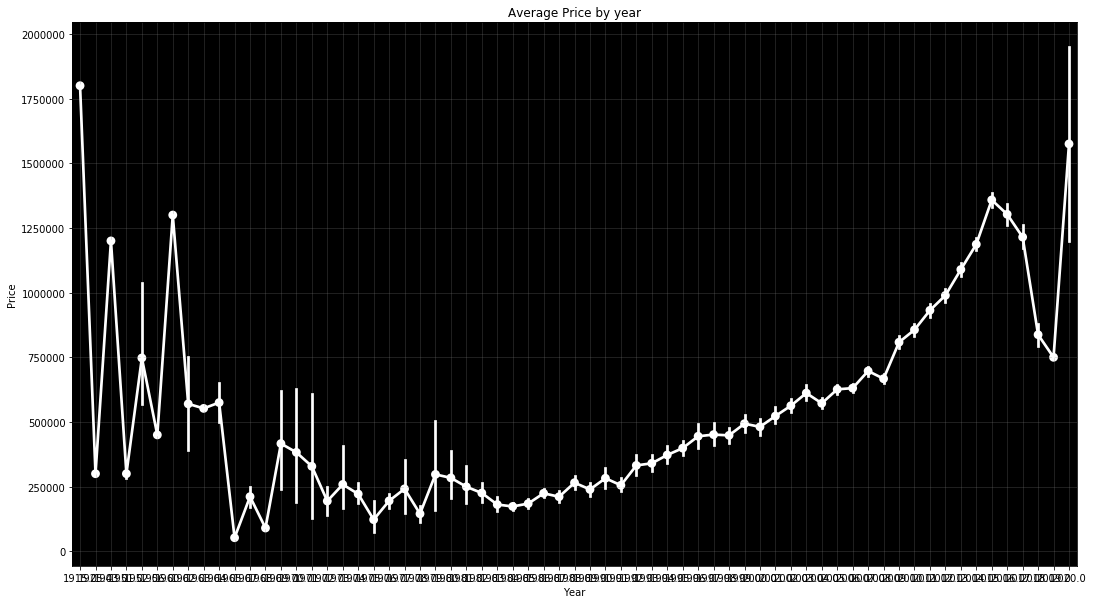

In [258]:
plt.figure(figsize=(18,10))
ax = sns.pointplot(df2["Year"],df2["Price"],color="w") # line is of white color
ax.set_facecolor("k") #background is black
plt.grid(True,color="grey",alpha=.3) # grid is on and its color is grey
plt.title("Average Price by year")
plt.show()

### <a id="3-7" > 3.7 Encoding the categorical data (one hot Encoding)</a>

In [259]:
# df2=df2.drop(['Transaction Type','Registered City'], axis=1)
# test=test.drop(['Transaction Type','Registered City'], axis=1)

In [260]:
df3=pd.get_dummies(df2,drop_first=True)
df3.head()

,KMs Driven,Price,Year,Brand_BMW,Brand_Changan,Brand_Chevrolet,Brand_Classic & Antiques,Brand_Daewoo,Brand_Daihatsu,Brand_FAW,...,Registered City_Sukkar,Registered City_Sukkur,Registered City_Swabi,Registered City_Tank,Registered City_Vehari,Registered City_Wah,Registered City_unknown,Transaction Type_Installment/Leasing,Transaction Type_unknown,Damaged_too_old
0,30000.0,2035000.0,2017.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26000.0,485000.0,1996.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11000.0,1700000.0,2016.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,89000.0,715000.0,2011.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12345.0,70000.0,1982.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## <a id="4"> 4.  Divide the data into training and test data </a>

In [261]:
df_y = df3['Price'].values
df_X = df3.drop(['Price'], axis=1)


In [262]:
test_size = 0.30

#Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(df_X,df_y, test_size=test_size,shuffle=True, random_state = 3)


X_test.to_csv("cleaned_test_set.tsv", sep='\t', encoding='utf-8',index=False)

temp2 = pd.DataFrame(data=Y_test.flatten())
temp2.columns = temp2.iloc[0]
temp2 = temp2.reindex(temp2.index.drop(0)).reset_index(drop=True)
temp2.columns.name = None
temp2.to_csv("actual_price_test.tsv", sep='\t', encoding='utf-8',index=False)


## <a id="5"> 5. Model</a>

## <a id="5-1" > A. Random forest Regressor</a>

In [263]:
rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

### <a id="5-1-1" > Grid searching of hyperparameters</a>

In [264]:
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, Y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   34.8s finished


In [265]:
print(gs.best_score_)
print(gs.best_params_)
 

0.8477942193119473
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [266]:
bp = gs.best_params_
rf_regressor = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### Training R squared score

In [267]:
print("Train R^2 Score:")
print('Score: %.2f' % rf_regressor.score(X_train, Y_train))

Train R^2 Score:
Score: 0.89


### <a id="5-1-2" > K-Fold cross validation </a>

Now we will do cross validation . This is because we split dataset in train and test. It may happen that test and train does not have uniform distribution of samples. So to make sure our model doesn't overfit i.e to generalize it we will do cross validation.

In [268]:
#Predicting the Price using cross validation (KFold method)
y_pred_rf = cross_val_predict(rf_regressor, X_train, Y_train, cv=10 )

#Random Forest Regression Accuracy with cross validation
accuracy_rf = metrics.r2_score(Y_train, y_pred_rf)
print('Cross-Predicted(KFold) Random Forest Regression Accuracy: %.2f '% accuracy_rf)

Cross-Predicted(KFold) Random Forest Regression Accuracy: 0.85 


In [269]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#### Cross validation score

In [270]:
scores = cross_val_score(rf_regressor, X_train, Y_train,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [189887.00484809 191791.74870786 187549.66613343 197205.12265354
 187408.65633315]
Mean: 190768.4397352116
Standard deviation: 3602.8772866452136


#### Test R squared score

In [271]:
print("Test R^2 Score:")
print('Score: %.2f' % rf_regressor.score(X_test, Y_test))

Test R^2 Score:
Score: 0.85


#### Comparison of first five predicted and actual price in train_set

In [272]:
y_pred=rf_regressor.predict(X_train)
y_pred[0:5]

array([1168206.7618049 , 1159426.79293153,  257438.78641221,
        383757.10213105,  327230.04270144])

In [273]:
list(Y_train[0:5])

[1145000.0, 1275000.0, 280000.0, 380000.0, 300000.0]

#### Root mean squared error

In [274]:
# The root mean squared error
y_pred =rf_regressor.predict(X_train)

forest_mse = mean_squared_error(Y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)

print("Root Mean squared error (training): %.2f"
      % forest_rmse)

Root Mean squared error (training): 168002.12


Let's find what features are most important

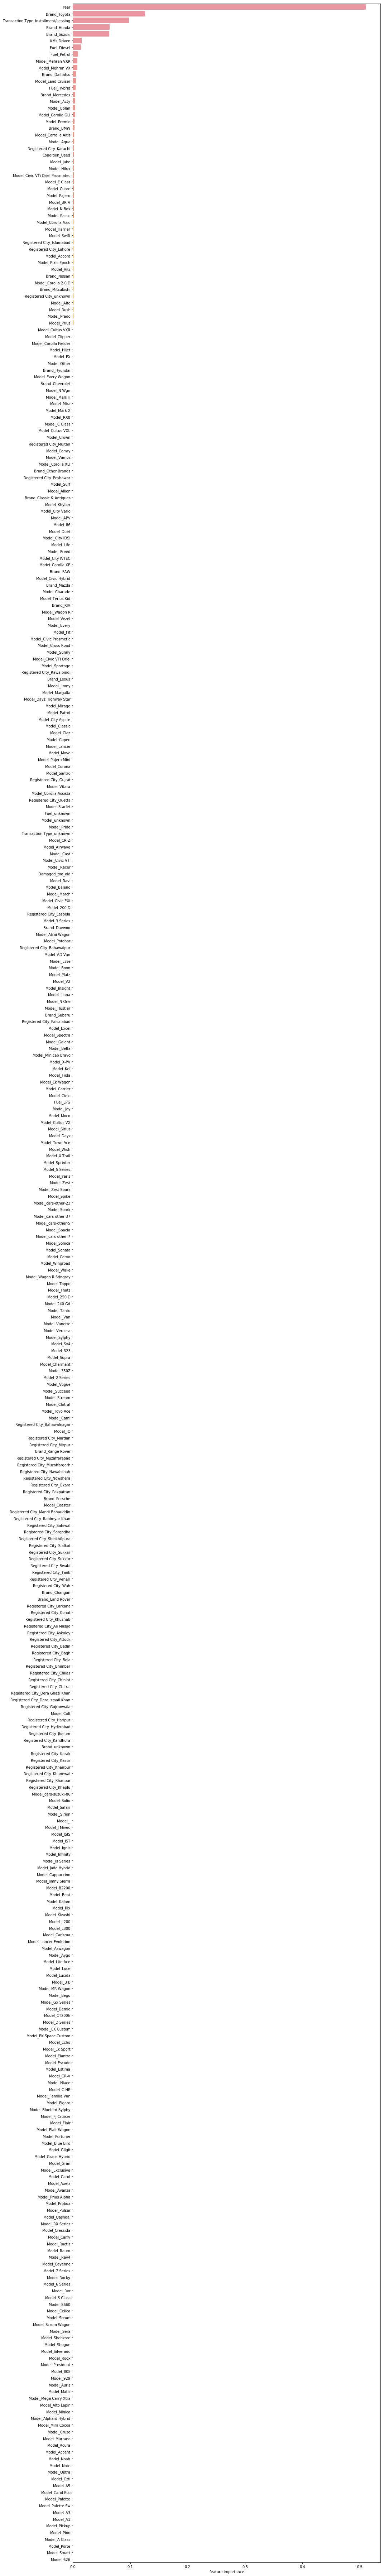

In [275]:
ranking = np.argsort(-rf_regressor.feature_importances_)
f, ax = plt.subplots(figsize=(15, 100))
sns.barplot(x=rf_regressor.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

Keeping 30 most dominant features

In [276]:

X_train1 = X_train.iloc[:,ranking[:30]]
X_test1 = X_test.iloc[:,ranking[:30]]


### <a id="5-1-3" > Correlation Matrix </a>

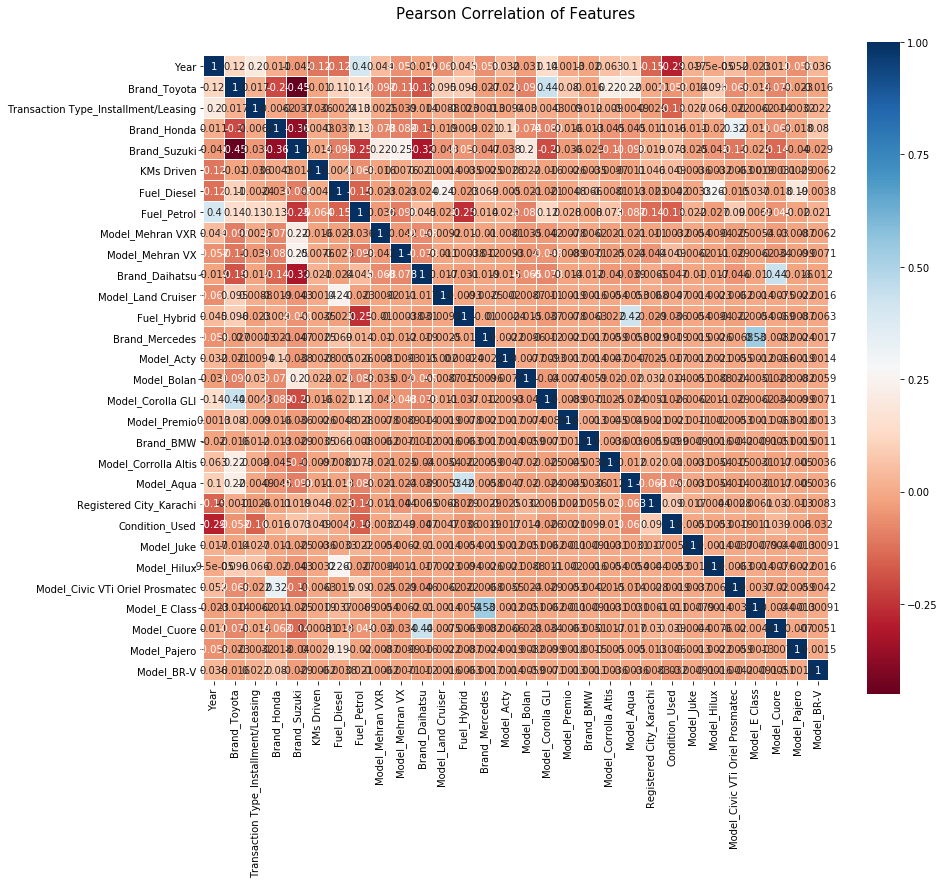

In [277]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train1.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

One thing that that the Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into our learning model because this means that there isn't much redundant or superfluous data in our training set. Here are two most correlated features are that of "Fuel_Petrol" and "Year".

Let's run the Linear Regression to check if removing the less dominant features improved the model from earlier version.

## <a id="5-2" > B. Linear Regression</a>

In [278]:
regr = LinearRegression()

regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### <a id="5-2-1" >Train R squared score</a>

In [279]:
print('Train R^2 \nscore: %.2f' % regr.score(X_train, Y_train))

Train R^2 
score: 0.82


### <a id="5-2-2" >Root mean squared error</a>

In [280]:
# The root mean squared error
y_pred =regr.predict(X_train)

lin_mse = mean_squared_error(Y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)

print("Root Mean squared error (training): %.2f"
      % lin_rmse)


Root Mean squared error (training): 212906.11


### <a id="5-2-3" >K-Fold Cross Validation</a>

In [281]:
#Predicting the Price using cross validation (KFold method)
y_pred_kf = cross_val_predict(regr, X_train, Y_train, cv=10 )

#Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(Y_train, y_pred_kf)
print('Cross-Predicted(KFold) Linear Regression Accuracy: %.2f' % accuracy_lf)


Cross-Predicted(KFold) Linear Regression Accuracy: 0.80


#### Cross validation score

In [282]:
scores = cross_val_score(regr, X_train, Y_train,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores= np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [222917.81766739 225898.99114685 221884.30223158 232829.0942275
 222153.04746248]
Mean: 225136.65054715952
Standard deviation: 4102.62670118157


#### Intercept and coefficients

In [283]:
#intercept
print('Intercept: \n', regr.intercept_)

# The coefficients
print('Coefficients: \n', regr.coef_)

Intercept: 
 -53090420.84670931
Coefficients: 
 [-2.14643928e-02  2.69447408e+04  6.94522173e+05 -3.89505810e+05
 -3.87983048e+05  8.91264532e+05  3.44754898e+05  3.57830842e+03
 -1.53565806e+05  5.52363464e+04 -1.52007917e+05 -2.41345346e+05
 -8.45222063e+04  2.50330718e+05  1.22224710e+04 -5.32467658e+04
 -1.61916710e+05  4.63941242e+03 -5.42372776e+04  3.63021247e+05
 -7.10753273e+04  3.04875745e+04 -9.26041611e+04  2.96968575e+05
 -8.93799627e+03 -6.10128967e+04  2.59471445e+05  7.53238371e+04
  6.06871723e+04  8.44204577e+04 -8.90579309e+04 -1.30235392e+06
  3.49592327e+05  4.78786430e+05  2.35984233e+04 -3.24661367e+05
 -1.83117396e+05  5.44544198e+05  4.03498427e+05 -3.53876804e+05
 -1.89005881e+05  8.11318048e+05  1.29256132e+05 -3.23524316e+05
 -1.33482261e+04  5.39976880e+05  2.54599097e+04  2.82807322e+05
  3.86730116e+05 -1.31592169e+05 -7.62136410e+03 -1.17800594e+05
  6.25845048e+04 -3.97657734e+05 -3.76012872e+05  2.03839287e+05
  3.11812811e+05 -4.76510813e+04 -2.445857

#### Comparison of first five predicted and actual price in train_set

In [284]:
y_pred[0:5]

array([1239547.92348647, 1155200.63151171,  233856.93686944,
        362041.79621772,  338587.38283481])

In [285]:
list(Y_train[0:5])

[1145000.0, 1275000.0, 280000.0, 380000.0, 300000.0]

### <a id="5-2-4" >Scatter Plot of Predicted Price Vs Actual Price</a> 

Text(0,0.5,'Predictions')

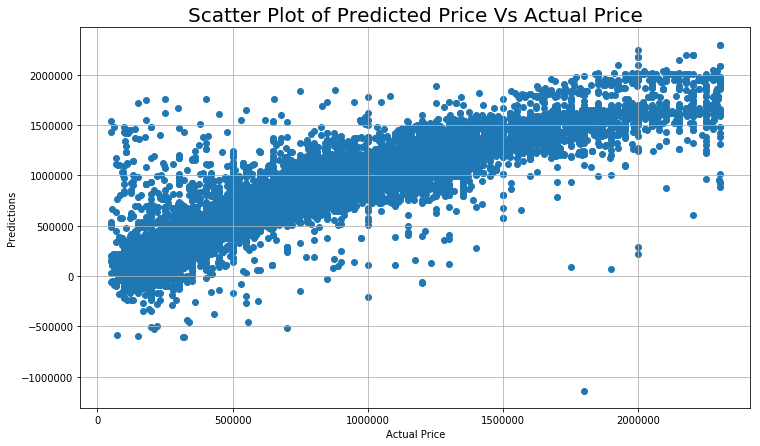

In [286]:
y_pred = regr.predict(X_train)
plt.figure(figsize=(12,7))
plt.grid(True)
plt.title('Scatter Plot of Predicted Price Vs Actual Price', y=1, size=20)
plt.scatter(Y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predictions")

### <a id="5-2-5" >Residual Plot</a> 

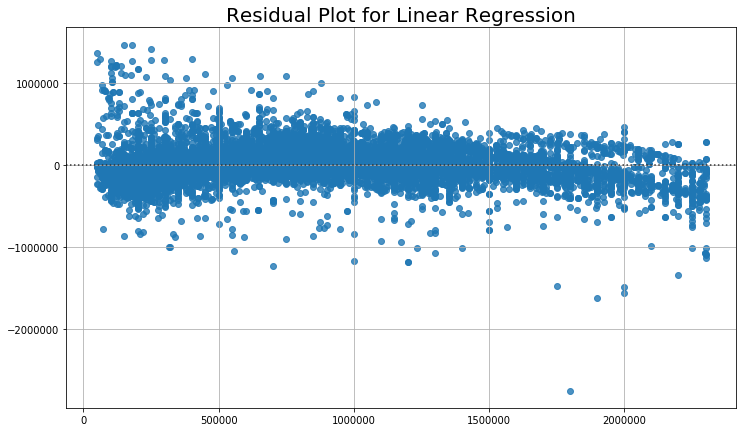

In [287]:
plt.figure(figsize=(12,7)) 
plt.grid(True)
plt.title('Residual Plot for Linear Regression', y=1, size=20) 
sns.residplot(Y_train,y_pred) # regression Residual Plot for linear regression model using bootstrapping

#### Test R squared score

In [288]:
print('Test R^2 \nscore: %.2f' % regr.score(X_test, Y_test))

Test R^2 
score: 0.80


**Train and Cross Validation score is quite comparable. So we can say that our model in not overfitting. <br>It is generalizing better.**

## <a id="6"> 6. Final prediction and Conclusion</a>

Linear Regression gives a score of  80% on final test dataset <br>
10-Fold Cross Validation score in case of Linear Regression =  80%<br>
***
Random Forest Regressor gives a score of 85% final test dataset <br>
10-Fold Cross Validation score in case of Random Forest Regressor = 86%<br>

In [289]:
submission = rf_regressor.predict(X_test)
filename = 'submission.csv'

temp2 = pd.DataFrame(data=submission.flatten())
temp2.columns = temp2.iloc[0]
temp2 = temp2.reindex(temp2.index.drop(0)).reset_index(drop=True)
temp2.columns.name = None
temp2.to_csv("submission.tsv", sep='\t', encoding='utf-8',index=False)

***